In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [4]:
labels = ['camel', 'classic', 'comma', 'deer', 'device0', 'device3','device4','device8','dog', 'face', 'fish', 'flatfish',
          'fountain', 'frog', 'guitar', 'hammer', 'hat', 'horse', 'horseshoe', 'phone']





In [5]:
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
train = get_data('DATASETJPG _SPLIT/train')
val = get_data('DATASETJPG _SPLIT/test')

In [12]:
train.shape

(400, 2)

Text(0.5, 1.0, 'camel')

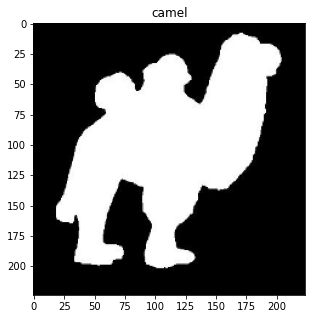

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'phone')

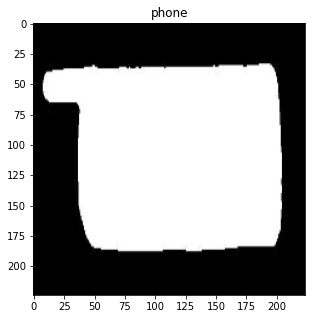

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

## Data Preprocessing

In [15]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [43]:
x_train.shape

(400, 224, 224, 3)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### CNN Modeling

In [26]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

## Optimizers


In [27]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

## Model fitting

In [29]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100
13/13 [==============================] - 7s 531ms/step - loss: 2.9864 - accuracy: 0.2275 - val_loss: 2.9853 - val_accuracy: 0.2937
Epoch 2/100
13/13 [==============================] - 8s 583ms/step - loss: 2.9853 - accuracy: 0.2550 - val_loss: 2.9839 - val_accuracy: 0.3000
Epoch 3/100
13/13 [==============================] - 7s 551ms/step - loss: 2.9840 - accuracy: 0.2800 - val_loss: 2.9826 - val_accuracy: 0.3313
Epoch 4/100
13/13 [==============================] - 7s 544ms/step - loss: 2.9831 - accuracy: 0.2975 - val_loss: 2.9811 - val_accuracy: 0.3625
Epoch 5/100
13/13 [==============================] - 7s 555ms/step - loss: 2.9823 - accuracy: 0.2850 - val_loss: 2.9794 - val_accuracy: 0.3750
Epoch 6/100
13/13 [==============================] - 7s 531ms/step - loss: 2.9816 - accuracy: 0.2825 - val_loss: 2.9777 - val_accuracy: 0.3562
Epoch 7/100
13/13 [==============================] - 7s 531ms/step - loss: 2.9789 - accuracy: 0.3250 - val_loss: 2.9758 - val_accuracy: 0.3562

Epoch 58/100
13/13 [==============================] - 7s 560ms/step - loss: 2.6046 - accuracy: 0.5475 - val_loss: 2.6047 - val_accuracy: 0.5312
Epoch 59/100
13/13 [==============================] - 7s 556ms/step - loss: 2.6024 - accuracy: 0.5575 - val_loss: 2.5994 - val_accuracy: 0.5562
Epoch 60/100
13/13 [==============================] - 7s 552ms/step - loss: 2.5977 - accuracy: 0.5575 - val_loss: 2.5935 - val_accuracy: 0.5750
Epoch 61/100
13/13 [==============================] - 7s 575ms/step - loss: 2.5915 - accuracy: 0.5925 - val_loss: 2.5882 - val_accuracy: 0.5875
Epoch 62/100
13/13 [==============================] - 7s 565ms/step - loss: 2.5847 - accuracy: 0.6025 - val_loss: 2.5828 - val_accuracy: 0.6000
Epoch 63/100
13/13 [==============================] - 7s 554ms/step - loss: 2.5808 - accuracy: 0.5875 - val_loss: 2.5772 - val_accuracy: 0.6062
Epoch 64/100
13/13 [==============================] - 7s 551ms/step - loss: 2.5773 - accuracy: 0.6125 - val_loss: 2.5716 - val_accuracy:

In [30]:
def plot_learningCurve(history, epochs_value):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs_value+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

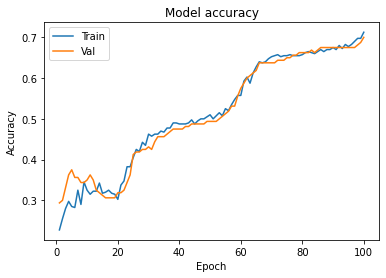

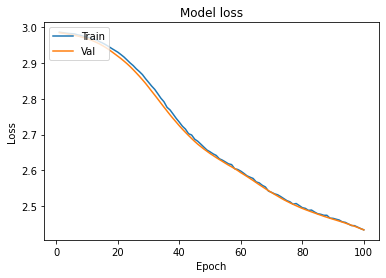

In [32]:
 plot_learningCurve(history,100)

In [41]:
from sklearn.metrics import classification_report, recall_score

In [45]:
y_pred = np.around(model.predict(x_val))
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [47]:
print(classification_report(y_val, y_pred, target_names=labels))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets